## Importing the dataset and performing EDA.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [28]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Ploting Data Using Histogram



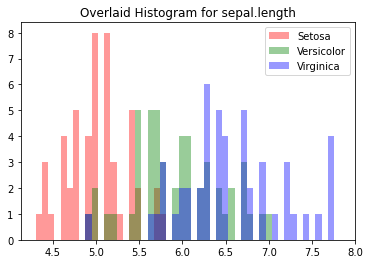

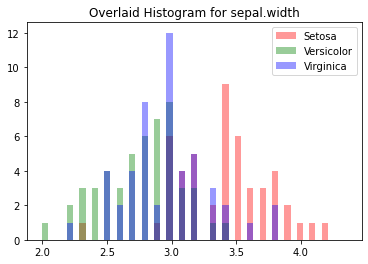

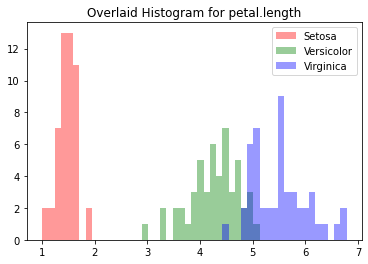

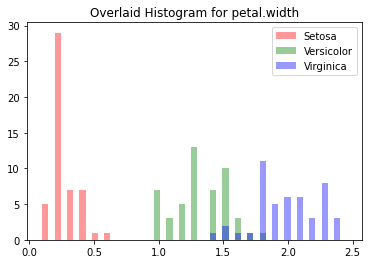

In [29]:
for i in ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']:
    Setosa = list(iris[iris['variety'] == "Setosa"][i].dropna())

    Versicolor = list(iris[iris['variety'] == "Versicolor"][i].dropna())

    Virginica = list(iris[iris['variety'] == "Virginica"][i].dropna())

    xmin = min(min(Setosa), min(Versicolor), min(Virginica))

    xmax = max(max(Setosa), max(Versicolor), max(Virginica))

    width = (xmax-xmin)/50

    sns.distplot(Setosa, color='r',kde=False, bins=np.arange(xmin, xmax, width))

    sns.distplot(Versicolor, color='g',kde=False, bins=np.arange(xmin, xmax, width))

    sns.distplot(Virginica, color='b',kde=False, bins=np.arange(xmin, xmax, width))

    plt.legend(['Setosa', 'Versicolor', 'Virginica'])

    plt.title('Overlaid Histogram for {}'.format(i))

    plt.show()

## Analysis:

It is seen from the histograms that, sepal.length and sepal.width are not having ideal data for the classification, whereas **petal.length and petla.width** can be used for the classification, as it shows seperation between variety better.

In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Turning the targeted variable "Variety" in numeric form.

In [31]:
iris_class = {'Setosa':1, 'Virginica':3, 'Versicolor':2}

iris['variety'] = iris['variety'].map(iris_class)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Saving Cleaned Data.

In [32]:
iris.to_csv('iris_cleaned.csv', index=False)

In [33]:
iris = pd.read_csv('iris_cleaned.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Spliting Dataset into first ratio of 60-20-20 (Training-Validation-Testing)

In [34]:
from sklearn.model_selection import train_test_split

features = iris.drop('variety', axis=1)
labels = iris['variety']

x_train1, x_test1, y_train1, y_test1 = train_test_split(features, labels, test_size=0.4, random_state=23)
x_test1, x_val1, y_test1, y_val1 = train_test_split(x_test1, y_test1, test_size=0.5, random_state=23)

Data split into 60-20-20

In [35]:
print(len(labels), len(y_train1), len(y_val1), len(y_test1))

150 90 30 30


# Spliting Dataset into second ratio of 80-10-10 (Training-Validation-Testing)

In [36]:
features = iris.drop('variety', axis=1)
labels = iris['variety']

x_train2, x_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.2, random_state=23)
x_test2, x_val2, y_test2, y_val2 = train_test_split(x_test2, y_test2, test_size=0.5, random_state=23)

Data split into 80-10-10

In [37]:
print(len(labels), len(y_train2), len(y_val2), len(y_test2))

150 120 15 15


In [38]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Writing out data

In [39]:
x_train1.to_csv('train1_features.csv', index=False)
x_val1.to_csv('val1_features.csv', index=False)
x_test1.to_csv('test1_features.csv', index=False)

y_train1.to_csv('train1_labels.csv', index=False)
y_val1.to_csv('val1_labels.csv', index=False)
y_test1.to_csv('test1_labels.csv', index=False)

x_train2.to_csv('train2_features.csv', index=False)
x_val2.to_csv('val2_features.csv', index=False)
x_test2.to_csv('test2_features.csv', index=False)

y_train2.to_csv('train2_labels.csv', index=False)
y_val2.to_csv('val2_labels.csv', index=False)
y_test2.to_csv('test2_labels.csv', index=False)

## Read in data for K-fold

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
tr1_features = pd.read_csv('train1_features.csv')
tr1_labels = pd.read_csv('train1_labels.csv', )

tr2_features = pd.read_csv('train2_features.csv')
tr2_labels = pd.read_csv('train2_labels.csv', )

## Fitting and evaluating basic model using K-fold cross validation using RandomForest

Here data is folded 5 times

In [41]:
rf = RandomForestClassifier()

scores1 = cross_val_score(rf, tr1_features, tr1_labels.values.ravel(), cv=5)

K-fold Scores for ratio 60-20-20

In [42]:
scores1

array([0.88888889, 1.        , 0.88888889, 0.94444444, 0.94444444])

In [43]:
rf = RandomForestClassifier()

scores2 = cross_val_score(rf, tr2_features, tr2_labels.values.ravel(), cv=5)

K-fold Scores for ratio 80-10-10

In [44]:
scores2

array([0.95833333, 0.875     , 0.95833333, 0.95833333, 0.95833333])

# Implementing Grid Search to find optimal hyperparameters for LR(Logistic Regression)

**First for the ratio 60-20-20**

In [45]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr1_features = pd.read_csv('train1_features.csv')
tr1_labels = pd.read_csv('train1_labels.csv', )

In [46]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [47]:

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv1_lr = GridSearchCV(lr, parameters, cv=5)
cv1_lr.fit(tr1_features, tr1_labels.values.ravel())

print_results(cv1_lr)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

BEST PARAMS: {'C': 1}

0.722 (+/-0.172) for {'C': 0.001}
0.911 (+/-0.113) for {'C': 0.01}
0.911 (+/-0.054) for {'C': 0.1}
0.944 (+/-0.07) for {'C': 1}
0.944 (+/-0.07) for {'C': 10}
0.944 (+/-0.07) for {'C': 100}
0.944 (+/-0.07) for {'C': 1000}


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [48]:
cv1_lr.best_estimator_

LogisticRegression(C=1)

**For  the ratio 80-10-10**

In [49]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv2_lr = GridSearchCV(lr, parameters, cv=5)
cv2_lr.fit(tr2_features, tr2_labels.values.ravel())

print_results(cv2_lr)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

BEST PARAMS: {'C': 10}

0.875 (+/-0.139) for {'C': 0.001}
0.875 (+/-0.118) for {'C': 0.01}
0.933 (+/-0.041) for {'C': 0.1}
0.958 (+/-0.0) for {'C': 1}
0.983 (+/-0.041) for {'C': 10}
0.983 (+/-0.041) for {'C': 100}
0.975 (+/-0.041) for {'C': 1000}


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [50]:
cv2_lr.best_estimator_

LogisticRegression(C=10)

## Saving the best models for both ratios.

In [51]:
joblib.dump(cv1_lr.best_estimator_, 'LR1_model.pkl')

joblib.dump(cv2_lr.best_estimator_, 'LR2_model.pkl')

['LR2_model.pkl']

# Implementing Grid Search to find optimal hyperparameters for RF(Random Forest)

**For the ratio 60-20-20**

In [52]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv1_rf = GridSearchCV(rf, parameters, cv=5)
cv1_rf.fit(tr1_features, tr1_labels.values.ravel())

print_results(cv1_rf)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 5}

0.9 (+/-0.083) for {'max_depth': 2, 'n_estimators': 5}
0.933 (+/-0.083) for {'max_depth': 2, 'n_estimators': 50}
0.944 (+/-0.099) for {'max_depth': 2, 'n_estimators': 250}
0.944 (+/-0.07) for {'max_depth': 4, 'n_estimators': 5}
0.933 (+/-0.083) for {'max_depth': 4, 'n_estimators': 50}
0.933 (+/-0.083) for {'max_depth': 4, 'n_estimators': 250}
0.933 (+/-0.083) for {'max_depth': 8, 'n_estimators': 5}
0.922 (+/-0.089) for {'max_depth': 8, 'n_estimators': 50}
0.922 (+/-0.089) for {'max_depth': 8, 'n_estimators': 250}
0.956 (+/-0.083) for {'max_depth': 16, 'n_estimators': 5}
0.933 (+/-0.083) for {'max_depth': 16, 'n_estimators': 50}
0.922 (+/-0.089) for {'max_depth': 16, 'n_estimators': 250}
0.922 (+/-0.089) for {'max_depth': 32, 'n_estimators': 5}
0.933 (+/-0.083) for {'max_depth': 32, 'n_estimators': 50}
0.933 (+/-0.083) for {'max_depth': 32, 'n_estimators': 250}
0.933 (+/-0.083) for {'max_depth': None, 'n_estimators': 5}
0.933 (+/-0.083)

In [53]:
cv1_rf.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=5)

**For the ratio 80-10-10**

In [54]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv2_rf = GridSearchCV(rf, parameters, cv=5)
cv2_rf.fit(tr2_features, tr2_labels.values.ravel())

print_results(cv2_rf)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 250}

0.933 (+/-0.1) for {'max_depth': 2, 'n_estimators': 5}
0.942 (+/-0.067) for {'max_depth': 2, 'n_estimators': 50}
0.95 (+/-0.082) for {'max_depth': 2, 'n_estimators': 250}
0.933 (+/-0.067) for {'max_depth': 4, 'n_estimators': 5}
0.942 (+/-0.067) for {'max_depth': 4, 'n_estimators': 50}
0.95 (+/-0.033) for {'max_depth': 4, 'n_estimators': 250}
0.942 (+/-0.041) for {'max_depth': 8, 'n_estimators': 5}
0.95 (+/-0.033) for {'max_depth': 8, 'n_estimators': 50}
0.95 (+/-0.033) for {'max_depth': 8, 'n_estimators': 250}
0.933 (+/-0.067) for {'max_depth': 16, 'n_estimators': 5}
0.942 (+/-0.067) for {'max_depth': 16, 'n_estimators': 50}
0.942 (+/-0.067) for {'max_depth': 16, 'n_estimators': 250}
0.942 (+/-0.041) for {'max_depth': 32, 'n_estimators': 5}
0.95 (+/-0.033) for {'max_depth': 32, 'n_estimators': 50}
0.95 (+/-0.033) for {'max_depth': 32, 'n_estimators': 250}
0.95 (+/-0.033) for {'max_depth': None, 'n_estimators': 5}
0.95 (+/-0.033) for {

In [55]:
cv2_rf.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=250)

## Saving best models for both ratio

In [56]:
joblib.dump(cv1_rf.best_estimator_, 'RF1_model.pkl')
joblib.dump(cv2_rf.best_estimator_, 'RF2_model.pkl')

['RF2_model.pkl']

# Implementing Grid Search to find optimal hyperparameters for Boosting

**For the rtio 60-20-20**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv1_gb = GridSearchCV(gb, parameters, cv=5)
cv1_gb.fit(tr1_features, tr1_labels.values.ravel())

print_results(cv1_gb)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.633 (+/-0.327) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.922 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.933 (+/-0.083) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.933 (+/-0.083) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.911 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.9 (+/-0.109) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.911 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.922 (+/-0.113) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.911 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.889 (+/-0.07) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.878 (+/-0.044) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.878 (+/-0.044) for {'learning_rat

In [58]:
cv1_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)

**For the ratio 80-10-10**

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv2_gb = GridSearchCV(gb, parameters, cv=5)
cv2_gb.fit(tr2_features, tr2_labels.values.ravel())

print_results(cv2_gb)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.95 (+/-0.033) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.95 (+/-0.033) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.95 (+/-0.033) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.95 (+/-0.033) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.942 (+/-0.041) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.942 (+/-0.041) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.942 (+/-0.041) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.95 (+/-0.033) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.933 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.933 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.942 (+/-0.085) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.933 (+/-0.067) for {'learning_rate':

In [60]:
cv2_gb.best_estimator_

GradientBoostingClassifier(n_estimators=250)

## Saving the best models for both ratios

In [61]:
joblib.dump(cv1_gb.best_estimator_, 'GB1_model.pkl')

joblib.dump(cv2_gb.best_estimator_, 'GB2_model.pkl')

['GB2_model.pkl']

## Comparing the performance of models using precision, recall, accuracy, latency.

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val1_features = pd.read_csv('val1_features.csv')
val1_labels = pd.read_csv('val1_labels.csv')

te1_features = pd.read_csv('test1_features.csv')
te1_labels = pd.read_csv('test1_labels.csv')

val2_features = pd.read_csv('val2_features.csv')
val2_labels = pd.read_csv('val2_labels.csv')

te2_features = pd.read_csv('test2_features.csv')
te2_labels = pd.read_csv('test2_labels.csv')

In [63]:
models1 = {}

for mdl in ['LR1', 'RF1', 'GB1']:
    models1[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [64]:
models1

{'LR1': LogisticRegression(C=1),
 'RF1': RandomForestClassifier(max_depth=16, n_estimators=5),
 'GB1': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)}

In [65]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [66]:
models2 = {}

for mdl in ['LR2', 'RF2', 'GB2']:
    models2[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [67]:
models2

{'LR2': LogisticRegression(C=10),
 'RF2': RandomForestClassifier(max_depth=2, n_estimators=250),
 'GB2': GradientBoostingClassifier(n_estimators=250)}

In [68]:
for name, mdl in models1.items():
    evaluate_model(name, mdl, val1_features, val1_labels)

LR1 -- Accuracy: 0.967 / Precision: 0.97 / Recall: 0.967 / Latency: 4.0ms
RF1 -- Accuracy: 0.933 / Precision: 0.945 / Recall: 0.933 / Latency: 4.0ms
GB1 -- Accuracy: 0.967 / Precision: 0.97 / Recall: 0.967 / Latency: 4.0ms


For the ratio 60-20-20, Logostic Regression and Boosting models performed best with simmilar scores of Accuracy, Precision and Recall.

In [69]:
for name, mdl in models2.items():
    evaluate_model(name, mdl, val2_features, val2_labels)

LR2 -- Accuracy: 0.933 / Precision: 0.947 / Recall: 0.933 / Latency: 0.0ms
RF2 -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 16.5ms
GB2 -- Accuracy: 0.933 / Precision: 0.947 / Recall: 0.933 / Latency: 0.0ms


For the ratio 80-10-10 , Random Forest model performed best.

## Analysis:

Split ratio of 80-10-10 has Score of 1.0 for Accuracy, Precision and Recall, for Random Forest model, however if we look at Logistic Regression and Boosting models, split ratio of 60-20-20 is giving better results and acceptable results for Random Forest with less latency.